In [2]:
from pyspark.sql import SparkSession
import pyspark.sql as pysparksql
import pandas 
import seaborn as sns

In [3]:
#Creating SparkSession and also loading the csv data
spark=SparkSession.builder.appName("HeartStroke").getOrCreate()
heart_stroke_train=spark.read.csv("train_2v.csv",inferSchema=True,header=True)

In [4]:
#Printing the schema 
heart_stroke_train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [5]:
#Printing the dimensions of the dataset(rows,columns)
heart_stroke_train.count(),len(heart_stroke_train.columns)

(43400, 12)

In [6]:
heart_stroke_train.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|           null|     0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|     0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|           null|     0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|     0|
|46136|  Male|14.0|           0|            0|         

In [7]:
heart_stroke_train.groupBy('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  783|
|     0|42617|
+------+-----+



In [8]:
heart_stroke_train.createOrReplaceTempView('heart')

+-------------+-----+
|    work_type|count|
+-------------+-----+
|      Private|  441|
|Self-employed|  251|
|     Govt_job|   89|
|     children|    2|
+-------------+-----+



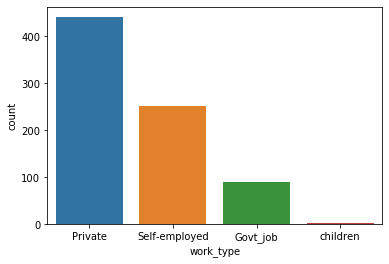

In [9]:
#We are finding which work type is more harmful. We are can see that people in private Jobs have more strokes 
heart_stroke_train.filter(heart_stroke_train['stroke']==1).groupBy('work_type').count().orderBy('count',ascending=False).show()
heart_stroke_train_plot=heart_stroke_train.filter(heart_stroke_train['stroke']==1).groupBy('work_type').count().orderBy('count',ascending=False)
sns.barplot(x='work_type',y='count',data=heart_stroke_train_plot.toPandas())

In [10]:
heart_stroke_train.filter(heart_stroke_train['stroke']==1).groupBy('smoking_status').count().orderBy('count',ascending=False).show()


+---------------+-----+
| smoking_status|count|
+---------------+-----+
|   never smoked|  284|
|formerly smoked|  221|
|           null|  145|
|         smokes|  133|
+---------------+-----+



Since we can see that we have the 'null' value in the smoke type. It will be better to replace it another parameter called 'No Info' as it will look cleaner

In [11]:
updated_info=heart_stroke_train.fillna('No Info',subset=['smoking_status'])
updated_info.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|        No Info|     0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|     0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|        No Info|     0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|     0|
|46136|  Male|14.0|           0|            0|         

We can now see that we null value in the smoking_status column has been replaced with No Info.

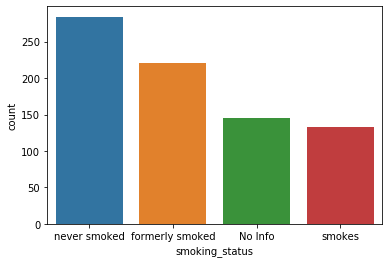

In [12]:
smoking_status_plot=updated_info.filter(heart_stroke_train['stroke']==1).groupBy('smoking_status').count().orderBy('count',ascending=False)
sns.barplot(x='smoking_status',y='count',data=smoking_status_plot.toPandas())

We can see that people who have never smoked have higher risk of heart_stroke

+----+-----+
| age|count|
+----+-----+
|82.0|   36|
|81.0|   43|
|80.0|   49|
|79.0|   70|
|78.0|   57|
|77.0|   24|
|76.0|   24|
|75.0|   23|
|74.0|   24|
|73.0|   15|
|72.0|   21|
|71.0|   19|
|70.0|   25|
|69.0|   20|
|68.0|   20|
|67.0|   23|
|66.0|   17|
|65.0|   18|
|64.0|    8|
|63.0|   18|
+----+-----+
only showing top 20 rows



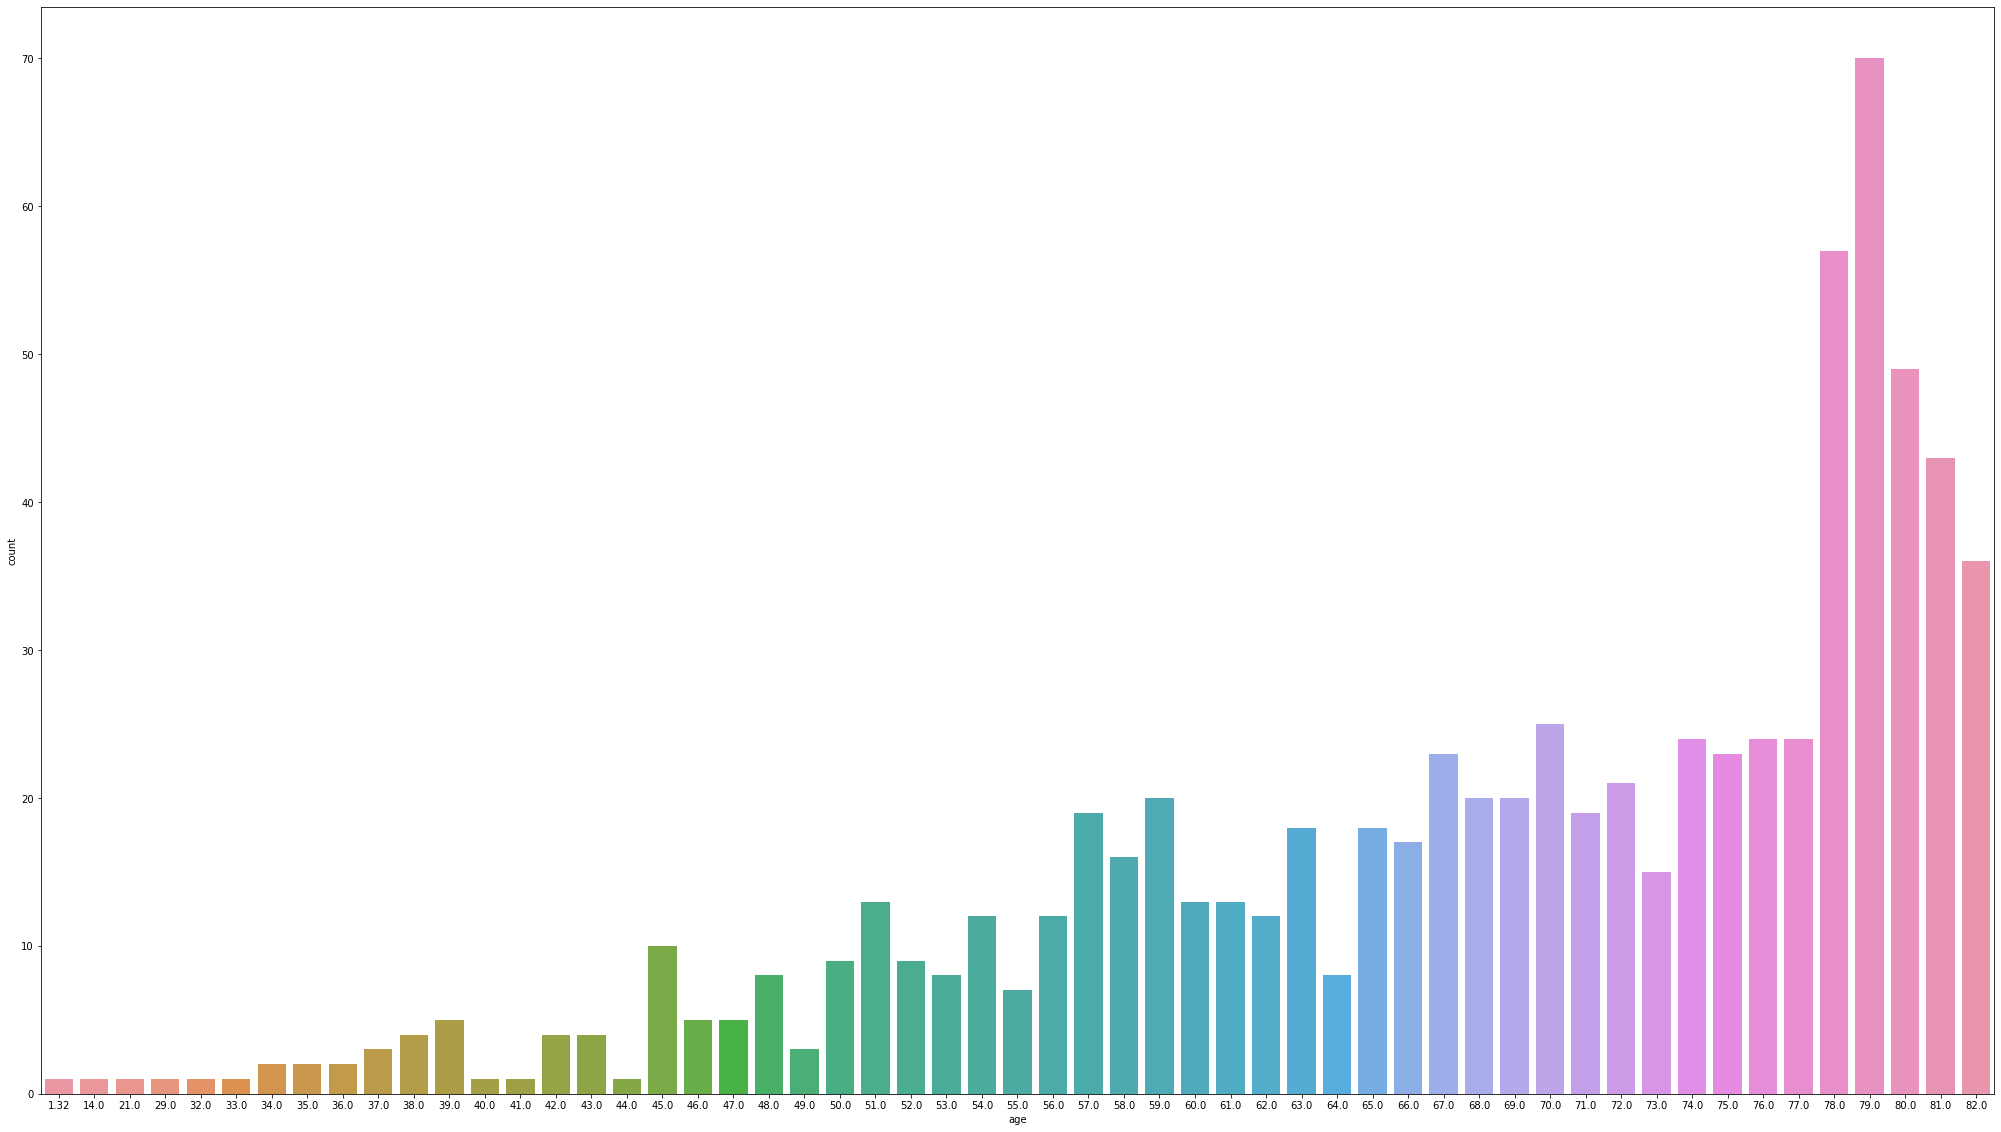

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
updated_info.filter(updated_info['stroke']==1).groupBy('age').count().orderBy('age',ascending=False).show()
plt.figure(figsize=(35, 20))
sns.barplot(x='age',y='count',data=updated_info.filter(updated_info['stroke']==1).groupBy('age').count().orderBy('age',ascending=False).toPandas())

In [22]:
updated_info.filter(updated_info['stroke']==1).select('bmi').show()

+----+
| bmi|
+----+
|36.6|
|null|
|32.5|
|34.4|
|24.0|
|29.0|
|27.4|
|22.8|
|null|
|24.2|
|29.7|
|36.8|
|27.3|
|null|
|28.2|
|30.9|
|37.5|
|25.8|
|37.8|
|null|
+----+
only showing top 20 rows



We can see that there is null value in the bmi column. In the following cell we will be replacing this with mean value in the column. This is part of the data cleaning task.

In [23]:
from pyspark.sql.functions import mean
mean = updated_info.select(mean(updated_info['bmi'])).collect()
mean_bmi = mean[0][0]
updated_info = updated_info.fillna(mean_bmi,['bmi'])
updated_info.filter(updated_info['stroke']==1).select('bmi').show()

+------------------+
|               bmi|
+------------------+
|              36.6|
|28.605038390004545|
|              32.5|
|              34.4|
|              24.0|
|              29.0|
|              27.4|
|              22.8|
|28.605038390004545|
|              24.2|
|              29.7|
|              36.8|
|              27.3|
|28.605038390004545|
|              28.2|
|              30.9|
|              37.5|
|              25.8|
|              37.8|
|28.605038390004545|
+------------------+
only showing top 20 rows



In [24]:
import pyspark.sql.functions as func
updated_info = updated_info.withColumn('bmi', func.round(updated_info['bmi'], 1))
updated_info.filter(updated_info['stroke']==1).select('bmi').show()

+----+
| bmi|
+----+
|36.6|
|28.6|
|32.5|
|34.4|
|24.0|
|29.0|
|27.4|
|22.8|
|28.6|
|24.2|
|29.7|
|36.8|
|27.3|
|28.6|
|28.2|
|30.9|
|37.5|
|25.8|
|37.8|
|28.6|
+----+
only showing top 20 rows



In [27]:
spark.sql("SELECT * FROM heart WHERE bmi=28.6").count()

241

Now we will be able to see the effect of BMI in the number of people who get the heart stroke. 

In [31]:
updated_info.filter(updated_info['stroke']==1).groupBy('bmi').count().orderBy('count',ascending=False).show()
plt.figure(figsize=(35, 20))
sns.barplot(x='bmi',y='count',data=updated_info.filter(updated_info['stroke']==1).groupBy('bmi').count().orderBy('count',ascending=False).toPandas())

+----+-----+
| bmi|count|
+----+-----+
|28.6|  143|
|26.6|    9|
|26.4|    9|
|31.4|    9|
|30.9|    9|
|31.5|    8|
|27.5|    8|
|30.7|    8|
|24.2|    7|
|25.8|    7|
|28.5|    7|
|27.7|    6|
|29.3|    6|
|27.0|    6|
|30.6|    6|
|28.0|    6|
|30.3|    6|
|27.3|    6|
|29.7|    6|
|25.0|    6|
+----+-----+
only showing top 20 rows

